      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9
Slope (Coefficient): 0.037174385515617095
Intercept: 14.2174147917439
R² Score: 0.004586344085821592


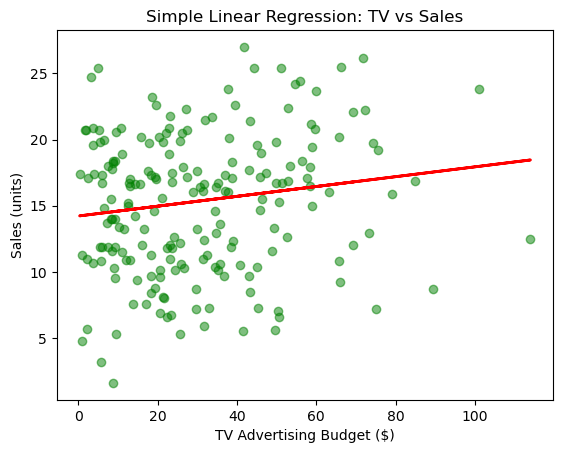

In [3]:
# Simple Linear Regression: TV → Sales
# Dataset: advertising.csv

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Load dataset
df = pd.read_csv("./advertising.csv")

# Display first few rows
print(df.head())

# Encode categorical columns if any
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = le.fit_transform(df[col])
        
# Select independent and dependent variables
X = df[["Newspaper"]]        # Independent variable
y = df["Sales"]       # Dependent variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Regression results
print("Slope (Coefficient):", model.coef_[0])
print("Intercept:", model.intercept_)
print("R² Score:", r2_score(y_test, y_pred))

# Plot regression line
plt.scatter(X, y, color='green', alpha=0.5)
plt.plot(X, model.predict(X), color='red', linewidth=2)
plt.xlabel("TV Advertising Budget ($)")
plt.ylabel("Sales (units)")
plt.title("Simple Linear Regression: TV vs Sales")
plt.show()
